In [1]:
# get imdb_cropped faces dataset
# !wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_crop.tar

In [2]:
# get imdb_cropped_faces metadata
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_meta.tar

--2021-05-08 22:15:12--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_meta.tar
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22937600 (22M) [application/x-tar]
Saving to: ‘imdb_meta.tar’

imdb_meta.tar       100%[===================>]  21.88M  5.74MB/s    in 3.8s    

2021-05-08 22:15:17 (5.74 MB/s) - ‘imdb_meta.tar’ saved [22937600/22937600]



In [3]:
# get wiki_cropped faces dataset
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar

--2021-05-08 22:15:17--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811315200 (774M) [application/x-tar]
Saving to: ‘wiki_crop.tar’

wiki_crop.tar       100%[===================>] 773.73M  10.5MB/s    in 77s     

2021-05-08 22:16:35 (10.1 MB/s) - ‘wiki_crop.tar’ saved [811315200/811315200]



In [4]:
# extract data from .tar files
!tar -xf imdb_meta.tar
!tar -xf wiki_crop.tar
#!tar -xf imdb_crop.tar

In [5]:
# show files in directory
!ls -d $PWD/*

/content/imdb		/content/sample_data  /content/wiki_crop.tar
/content/imdb_meta.tar	/content/wiki_crop


In [6]:
# remove .tar files
!rm *.tar

In [7]:
# show extracted files
!ls -d $PWD/imdb/*

/content/imdb/imdb.mat


In [8]:
# import relevant libraries
import scipy.io
import pandas as pd
import numpy as np
import pandas as pd
from keras.preprocessing import image
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
# import cv2
# from datetime import datetime, timedelta

In [9]:
 # load extracted MATLAB files
 imdb_meta = scipy.io.loadmat('/content/imdb/imdb.mat')
 wiki_meta = scipy.io.loadmat('/content/wiki_crop/wiki.mat')

In [10]:
# show IMDB_meta
# imdb_meta

In [11]:
# show WIKI_meta
# wiki_meta

In [12]:
# get length of IMDB and WIKI dataset
len_imdb = imdb_meta['imdb'][0][0][0].shape[1]
len_wiki = wiki_meta['wiki'][0][0][0].shape[1]
len_imdb, len_wiki

(460723, 62328)

In [13]:
dtypes=[('dob', 'O'), ('photo_taken', 'O'), ('full_path', 'O'), ('gender', 'O'), ('name', 'O'), ('face_location', 'O'), ('face_score', 'O'), ('second_face_score', 'O'), ('celeb_names', 'O'), ('celeb_id', 'O')]

In [14]:
# get columns for dataframe
columns = [i[0] for i in dtypes]
#columns

In [15]:
# create IMDB and WIKI dataframes
imdb_df = pd.DataFrame(index= range(0, len_imdb), columns= columns)
wiki_df = pd.DataFrame(index= range(0, len_wiki), columns= columns)

In [16]:
# get data from meta files
imdb_array = imdb_meta['imdb'][0][0]
wiki_array = wiki_meta['wiki'][0][0]

In [17]:
# add IMDB_meta data to dataframe
for i, j in enumerate(imdb_array):
  imdb_df[columns[i]] = pd.DataFrame(imdb_array[i][0])

In [18]:
# add IMDB_meta data to dataframe
for i, j in enumerate(wiki_array):
  wiki_df[columns[i]] = pd.DataFrame(wiki_array[i][0])

In [19]:
# preview imdb data
# imdb_df.head()

In [20]:
# preview wiki data
# wiki_df.head()

In [21]:
# function to convert datenum to datetime
def datenum_to_datetime(datenum):
    """
    Convert Matlab datenum into Python datetime.
    :param datenum: Date in datenum format
    :return:        Datetime object corresponding to datenum.
    """
    origin = np.datetime64('0000-01-01', 'D') - np.timedelta64(1, 'D')
    date = datenum * np.timedelta64(1, 'D') + origin
    year = date.astype('datetime64[Y]').astype(int) + 1970
 
    return year

In [22]:
# alternative conversion function
# def datenum_to_datetime(datenum):
#     """
#     Convert Matlab datenum into Python datetime.
#     :param datenum: Date in datenum format
#     :return:        Datetime object corresponding to datenum.
#     """
#     date = datetime.fromordinal(int(datenum)) + timedelta(days=datenum%1) - timedelta(days = 366)
#     year = date.year
 
#     return year

In [23]:
# test date conversion function
# datenum_to_datetime(600000)

In [24]:
# convert datenum column to datetime
imdb_df['date_of_birth'] = imdb_df['dob'].apply(datenum_to_datetime)
wiki_df['date_of_birth'] = wiki_df['dob'].apply(datenum_to_datetime)

In [25]:
# show unique values in date of birth column
# imdb_df['date of birth'].unique()

In [26]:
# show unique values in date of birth column
# wiki_df['date of birth'].unique()

In [27]:
# join IMDB and WIKI datframes
df = pd.concat([imdb_df,wiki_df], axis='rows', keys= ['imdb', 'wiki'])
# df.head()

In [28]:
# get IMDB dataframe by key
# df.loc['imdb']

In [29]:
# get WIKI dataframe by key
# df.loc['wiki']

In [30]:
# create age column
df['age'] = df['photo_taken'] - df['date_of_birth']
# df['age'].unique()

# Data Cleaning

In [31]:
# show rows with illogical ages
# df[df['age'] <0][['name','photo_taken', 'date_of_birth']].values[:10]
# df[df['age'] >120][['name','photo_taken', 'date_of_birth']].values[:10]
# df[df['photo_taken']< df['date_of_birth']]

Milla Jovovich was born in 1975 while Uma Thurman was born in 1970, the pictures couldn't have been taken in 1963 and 1964 respectively which was before their births.

Some other pictures appear to have been taken after the deaths of the some celebrities (which is unsual), ths could reperesnt paintings and not real faces.

In [32]:
# show data column names
df.columns, len(df)

(Index(['dob', 'photo_taken', 'full_path', 'gender', 'name', 'face_location',
        'face_score', 'second_face_score', 'celeb_names', 'celeb_id',
        'date_of_birth', 'age'],
       dtype='object'), 523051)

In [33]:
# remove data of pictures that are not faces
df = df[df['face_score'] != -np.inf]
len(df)

442733

In [34]:
# show  pictures that include more than one face
# df[~df['second_face_score'].isna()]

In [35]:
#some pictures include more than one face, remove them
df = df[df['second_face_score'].isna()]
len(df)

224840

In [36]:
# show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 224840 entries, ('imdb', 3) to ('wiki', 62327)
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dob                224840 non-null  int32  
 1   photo_taken        224840 non-null  uint16 
 2   full_path          224840 non-null  object 
 3   gender             221145 non-null  float64
 4   name               224840 non-null  object 
 5   face_location      224840 non-null  object 
 6   face_score         224840 non-null  float64
 7   second_face_score  0 non-null       float64
 8   celeb_names        8149 non-null    object 
 9   celeb_id           184624 non-null  object 
 10  date_of_birth      224840 non-null  int64  
 11  age                224840 non-null  int64  
dtypes: float64(3), int32(1), int64(2), object(5), uint16(1)
memory usage: 43.0+ MB


In [37]:
# gender_df = df[['full_path', 'gender']]
# gender_df.dropna(inplace=True)
# gender_df.head()

In [38]:
# remove illogical ages from dataframe
df = df[(df.age >= 1) & (df.age <= 100)]
len(df)

224562

In [39]:
# drop irrelevant columns
df = df[['full_path', 'age', 'gender']]
# df.isna().sum()

In [40]:
# preview dataframe
# df.head(3)

In [41]:
# check for null values
# df.isna().sum()

In [42]:
# drop rows with null values
df = df.dropna()  

# Exploratary Data Analysis

In [43]:
# define gender label dictionary 
gender_dict = {0: 'female', 1: 'male'}

In [44]:
# show geder count
gender_count = pd.DataFrame(df['gender'].value_counts()).rename(index=gender_dict, columns= {'gender':'Num_values'})
gender_count

,Num_values
male,129593
female,91277


In [45]:
# plot pie plot of gender distribution
pie_plot = go.Pie(labels= gender_count.index.to_list(), values=gender_count.values.flatten(), 
                  hole=0.3, text= gender_count.index.to_list(),textposition= 'auto')
fig = go.Figure(data=[pie_plot])
fig.update_layout(title_text='Pie Plot of Gender Distribution')
fig.show()

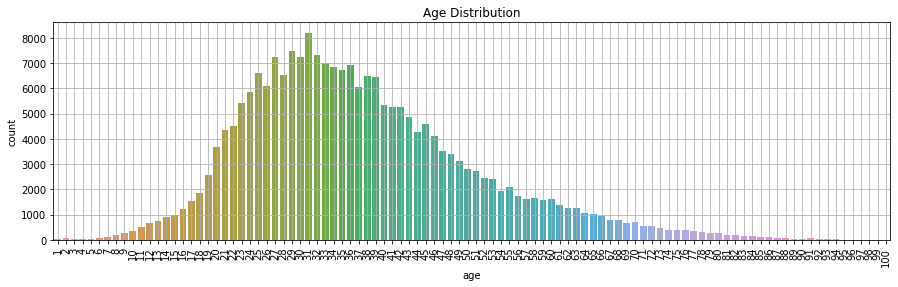

In [46]:
# plot chart of age distribuion
plt.figure(figsize =(15,4))

sns.countplot(x= 'age', data= df)
plt.title('Age Distribution')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

The gender distribution seems fairly balanced

In [47]:
# define bins for ages
bins = [0, 10, 20, 30, 40, 60, 80, 90, np.inf]
names = ['<10', '10-20', '20-30', '30-40', '40-60', '60-80', '80', '90+']

# get bins for ages
age_binned = pd.cut(df['age'], bins, labels=names)
age_binned.head()

imdb  3     60-80
      4     60-80
      6     60-80
      7     60-80
      12    40-60
Name: age, dtype: category
Categories (8, object): ['<10' < '10-20' < '20-30' < '30-40' < '40-60' < '60-80' < '80' < '90+']

In [48]:
# get labels of bins
bin_labels = age_binned.value_counts().index.to_list()

# get counts of bins
bin_counts = age_binned.value_counts().values

In [49]:
# plot distribution for binned ages
plot = go.Bar(x=bin_labels, y=bin_counts)
fig = go.Figure(data=[plot])
fig.update_layout(title_text='Binned Age Distribution', xaxis={'categoryorder':'array', 'categoryarray':names})

In [50]:
 # split dataframe 
 imdb_df = df.loc['imdb']
 wiki_df = df.loc['wiki']

In [51]:
# show length of IMDB and WIKI dataframes 
len(imdb_df), len(wiki_df)

(181473, 39397)

In [52]:
imdb_df.head()

,full_path,age,gender
3,[01/nm0000001_rm946909184_1899-5-10_1968.jpg],69,1.0
4,[01/nm0000001_rm980463616_1899-5-10_1968.jpg],69,1.0
6,[02/nm0000002_rm1346607872_1924-9-16_2004.jpg],80,0.0
7,[02/nm0000002_rm1363385088_1924-9-16_2004.jpg],80,0.0
12,[02/nm0000002_rm221957120_1924-9-16_1974.jpg],50,0.0


In [53]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181473 entries, 3 to 460722
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   full_path  181473 non-null  object 
 1   age        181473 non-null  int64  
 2   gender     181473 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.5+ MB


In [ ]:
imdb_df['age'] = imdb_df['age'].apply(lambda x: str(x))
imdb_df['gender'] = imdb_df['gender'].apply(lambda x: str(int(x)))

wiki_df['age'] = wiki_df['age'].apply(lambda x: str(x))
wiki_df['gender'] = wiki_df['gender'].apply(lambda x: str(int(x)))

In [55]:
imdb_df.head()

,full_path,age,gender
3,[01/nm0000001_rm946909184_1899-5-10_1968.jpg],69,1
4,[01/nm0000001_rm980463616_1899-5-10_1968.jpg],69,1
6,[02/nm0000002_rm1346607872_1924-9-16_2004.jpg],80,0
7,[02/nm0000002_rm1363385088_1924-9-16_2004.jpg],80,0
12,[02/nm0000002_rm221957120_1924-9-16_1974.jpg],50,0


In [56]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181473 entries, 3 to 460722
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   full_path  181473 non-null  object
 1   age        181473 non-null  object
 2   gender     181473 non-null  object
dtypes: object(3)
memory usage: 5.5+ MB


In [57]:
# export dataframe to csv
imdb_df.to_csv('imdb.csv')
wiki_df.to_csv('wiki.csv')

In [ ]:
# download exported files
files.download('imdb.csv')
files.download('wiki.csv')

In [ ]:
# # get image pixels
# def getImagePixels( image_path, folder_path,):
#   """
#     Gets the pixels of th input images.
#     :param image_path: path to the image file
#     :param folder_path: path to the image folder
#     :return: array of image pixels.
#     """
#   img = image.load_img(folder_path + image_path[0], grayscale=False, target_size=TARGET_SIZE)
#   pixel = image.img_to_array(img).reshape(1, -1)[0]
#   val = ''
#   for i in  pixel:
#     a = str(i) + ' ' 
#     val += a
#   return val[:-1]

In [ ]:
# alternative function to get pixels
# def load_images(series, folder_path):
#   features = []
#   for  path in series.values:
#     image_path = folder_path + path[0]
#     image = cv2.imread(image_path)
#     resized_image = cv2.resize(image, TARGET_SIZE)
#     features.append(np.array(resized_image))
#   return features

# imdb_features = load_images(age_df['full_path'].loc['imdb'], 'imdb_crop/')
# wiki_features = load_images(age_df['full_path'].loc['wiki'], 'wiki_crop/')

In [ ]:
# create column of pixels
# imdb_df['pixels'] = imdb_df['full_path'].apply(getImagePixels, folder_path='imdb_crop/')
# wiki_df['pixels'] = wiki_df['full_path'].apply(getImagePixels, folder_path='wiki_crop/')

In [ ]:
# get pixels as numpy arrays
# X_train = imdb_1['pixels'].apply(lambda x: np.array(x.split(' '), dtype='float32'))